In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree



In [2]:
df = pd.read_csv('olympic_analysis_data.csv')
print(df.head())

  country_name country_code_2 country_code_3  year  hosting_status  \
0      Germany             DE            GER  2004               0   
1    Australia             AU            AUS  2004               0   
2        Japan             JP            JPN  2004               0   
3       France             FR            FRA  2004               0   
4        Italy             IT            ITA  2004               0   

   population  gdp_per_capita  life_expectancy  pop_20_39_percent  \
0    82100000           44200             79.3               26.8   
1    20000000           43100             80.9               28.6   
2   128000000           38400             82.5               27.0   
3    61200000           42000             80.3               26.8   
4    58200000           44500             80.8               28.5   

   urban_population_percent   bmi_mean  area_sq_km  democracy_score  \
0                      75.8  26.282759      357000               10   
1                     

In [3]:
df = df.drop(['country_name', 'country_code_2', 'country_code_3', 'slug_game'], axis=1)

In [4]:
df_train = df[df['year'] < 2012]
df_validation = df[(df['year'] == 2012) | (df['year'] == 2016)]
df_test = df[df['year'] == 2020]
y_train = df_train['total_medal_count']
X_train = df_train.drop(['total_medal_count'], axis=1)
X_validation = df_validation.drop(['total_medal_count'], axis=1)
y_validation = df_validation['total_medal_count']
X_test = df_test.drop(['total_medal_count'], axis=1)
y_test = df_test['total_medal_count']
print(X_test.head())
#X_train = df_train.drop(['total_medal_count'], axis=1)
#print(X.head())

     year  hosting_status  population  gdp_per_capita  life_expectancy  \
797  2020               1   126000000           40000             85.1   
798  2020               0    25700000           48700             84.1   
799  2020               0    83600000           51800             80.8   
800  2020               0    59900000           39100             82.0   
801  2020               0    17600000           54300             81.3   

     pop_20_39_percent  urban_population_percent   bmi_mean  area_sq_km  \
797               20.5                      91.8  22.700000      378000   
798               28.6                      86.2  26.193103     7740000   
799               24.5                      77.5  26.282759      358000   
800               21.7                      71.0  25.765517      302000   
801               25.4                      92.2  24.872414       41500   

     democracy_score  
797               10  
798               10  
799               10  
800         

In [11]:
rf = RandomForestRegressor(n_estimators=15, random_state=0, oob_score=True)
rf.fit(X_train, y_train)




RandomForestRegressor(n_estimators=15, oob_score=True, random_state=0)

In [6]:
oob_score = rf.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
y_pred = rf.predict(X_validation)

mse = mean_squared_error(y_validation,y_pred )
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_validation, y_pred)
print(f'R-squared: {r2}')


Out-of-Bag Score: 0.709267654418315
Mean Squared Error: 30.57542253521126
R-squared: 0.7198351973941322


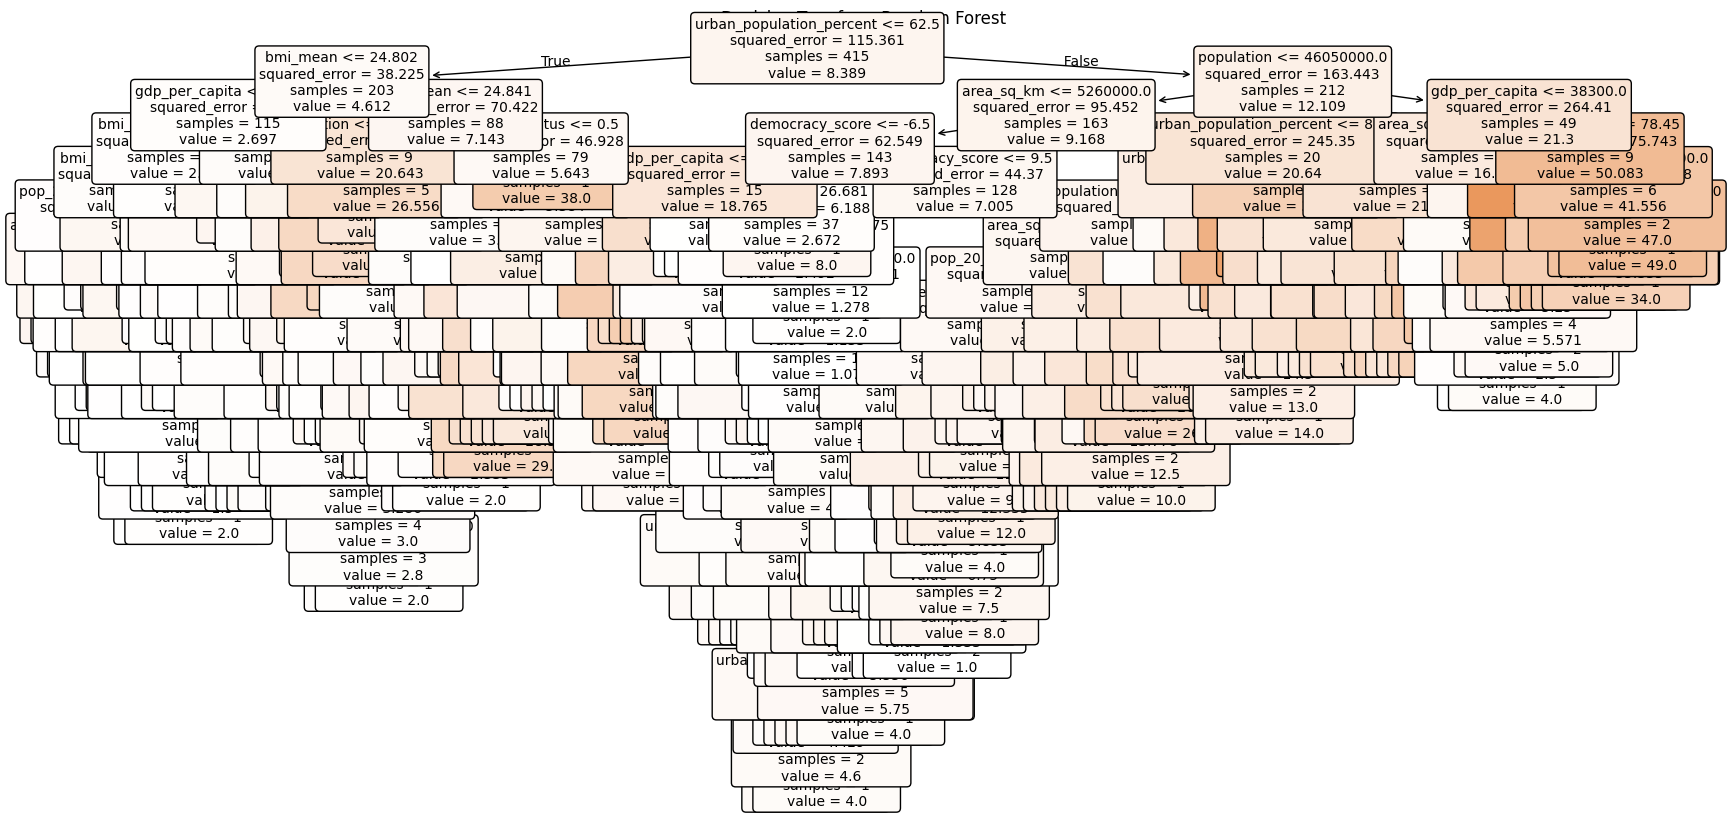

In [7]:
'''
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = rf.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()'''

In [8]:
y_testpred = rf.predict(X_test)


mse = mean_squared_error(y_test,y_testpred )
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test,y_testpred)
print(f'R-squared: {r2}')

Mean Squared Error: 53.09084084084084
R-squared: 0.657599467135671


In [10]:
pd.DataFrame({'actual': y_test, 'predicted': y_testpred}).to_csv('predictions.csv', index=False)
print(X_test)

     year  hosting_status  population  gdp_per_capita  life_expectancy  \
797  2020               1   126000000           40000             85.1   
798  2020               0    25700000           48700             84.1   
799  2020               0    83600000           51800             80.8   
800  2020               0    59900000           39100             82.0   
801  2020               0    17600000           54300             81.3   
..    ...             ...         ...             ...              ...   
866  2020               0     2800000           37200             75.1   
867  2020               0    36600000            7550             73.0   
868  2020               0     1870000           15800             72.3   
869  2020               0    31000000           44800             73.5   
870  2020               0     6950000           14300             70.5   

     pop_20_39_percent  urban_population_percent   bmi_mean  area_sq_km  \
797               20.5              